# Init

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

%matplotlib inline

# Q-Learning

In [82]:
env = gym.make('CartPole-v0')

In [88]:
class QLearningAgent:
    def __init__(self, n_states, n_actions, gamma, alpha, epsilon, epsilon_min, epsilon_decay):
        self.n_states = n_states
        self.n_actions = n_actions
        self.GAMMA = gamma
        self.ALPHA = alpha
        self.EPSILON = epsilon
        self.epsilon_min = epsilon_min 
        self.epsilon_decay = epsilon_decay
        self.Q = np.zeros((*n_states, n_actions))
        self.bins = self.create_bins()

    # e-GREEDY POLICY
    def get_action(self, state, greedy=False):
        if( (np.random.uniform() >= self.EPSILON) or greedy):
            action = np.argmax(self.Q[state])
        else:
            action = env.action_space.sample()
        return action
    
    # Q-Learning
    def update_q(self, state, action, reward, state_):
        actionMAX_ = np.argmax(self.Q[state_])
        qMAX_ = self.Q[state_][actionMAX_]
        self.Q[state][action] += (self.ALPHA * (reward + (self.GAMMA * qMAX_) - self.Q[state][action]))
        self.decay_epsilon()

    def decay_epsilon(self):
        if(self.EPSILON > self.epsilon_min):
            self.EPSILON = self.EPSILON * self.epsilon_decay
        else:
            self.EPSILON = self.epsilon_min

    # DISCRETIZING CONTINUOUS SPACE
    def create_bins(self):
        bins = [None] * 4
        bins[0] = np.linspace(-2.4, 2.4, self.n_states[0])
        bins[1] = np.linspace(-5, 5, self.n_states[1])
        bins[2] = np.linspace(-0.418, 0.418, self.n_states[2])
        bins[3] = np.linspace(-5, 5, self.n_states[3])
        return np.array(bins)

    # GIVEN OBSERVATION ARRAY AND BINS, RETURNS STATE NUMBER
    def get_state(self, observation):
        state = [None] * 4
        for i in range(4):
            state[i] = int(np.digitize(observation[i], self.bins[i]) - 1)
        return tuple(state)

In [89]:
#PLAY SINGLE EPISODE - Q-Learning
def play_episode(agent):
    total_reward = 0

    observation = env.reset()
    state = agent.get_state(observation)
    
    for moves in range(MAX_MOVES):
        # e-GREEDY
        action = agent.get_action(state)

        # TAKE ACTION
        observation_, reward, done, _ = env.step(action)

        # PUNISH FOR FAILURE
        if( done and (moves < (MAX_MOVES - 5)) ):
            reward = -300
        total_reward += reward

        # UPDATE Q-VALUES (greedify - Off policy)
        state_ = agent.get_state(observation_)
        agent.update_q(state, action, reward, state_)

        state = state_

        # BREAK IF TERMINATED
        if(done): break 

    return (round(total_reward), round(moves))

In [90]:
# Init
MAX_MOVES = env._max_episode_steps #200
N_STATES = (10, 10, 10, 10)
NUM_EPISODES = 3000

agent = QLearningAgent(n_states = N_STATES,
                       n_actions = env.action_space.n,
                       gamma = 0.9,
                       alpha = 0.01,
                       epsilon = 1.0,
                       epsilon_min = 0.01,
                       epsilon_decay=0.999968)

In [91]:
# TRAINING
episode_rewards = []
episode_lengths = []
mean_rewards = [] # MEAN REWARD OF LAST 100 GAMES

for episode_n in (range(NUM_EPISODES)):
    
    episode_reward, episode_length = play_episode(agent)
    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)

    if((episode_n + 1)%100 == 0):
        mean_reward = np.mean(episode_rewards[-100:])
        mean_rewards.append(mean_reward)
        print(" ITER: ",(episode_n),"\tMEAN_REWARD: ",mean_reward ,"\tEPSILON: ",round(agent.EPSILON,4), "\tLENGTH: ",episode_length)

ITER:  99 	MEAN_REWARD:  -279.13 	EPSILON:  0.9324 	LENGTH:  17
 ITER:  199 	MEAN_REWARD:  -277.19 	EPSILON:  0.864 	LENGTH:  11
 ITER:  299 	MEAN_REWARD:  -271.73 	EPSILON:  0.7868 	LENGTH:  21
 ITER:  399 	MEAN_REWARD:  -266.88 	EPSILON:  0.7054 	LENGTH:  53
 ITER:  499 	MEAN_REWARD:  -261.58 	EPSILON:  0.6218 	LENGTH:  82
 ITER:  599 	MEAN_REWARD:  -247.82 	EPSILON:  0.5245 	LENGTH:  129
 ITER:  699 	MEAN_REWARD:  -239.29 	EPSILON:  0.4305 	LENGTH:  48
 ITER:  799 	MEAN_REWARD:  -226.67 	EPSILON:  0.3394 	LENGTH:  43
 ITER:  899 	MEAN_REWARD:  -213.28 	EPSILON:  0.2588 	LENGTH:  105
 ITER:  999 	MEAN_REWARD:  -197.52 	EPSILON:  0.1876 	LENGTH:  118
 ITER:  1099 	MEAN_REWARD:  -187.34 	EPSILON:  0.1342 	LENGTH:  84
 ITER:  1199 	MEAN_REWARD:  -162.4 	EPSILON:  0.0887 	LENGTH:  124
 ITER:  1299 	MEAN_REWARD:  -163.16 	EPSILON:  0.0576 	LENGTH:  127
 ITER:  1399 	MEAN_REWARD:  -159.56 	EPSILON:  0.037 	LENGTH:  133
 ITER:  1499 	MEAN_REWARD:  -167.25 	EPSILON:  0.0243 	LENGTH:  153
 IT

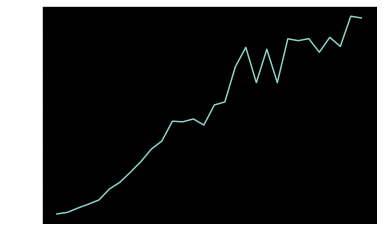

In [92]:
plt.plot(mean_rewards)

# SARSA

In [93]:
env = gym.make('CartPole-v0')

In [103]:
class SARSAAgent:
    def __init__(self, n_states, n_actions, gamma, alpha, epsilon, epsilon_min, epsilon_decay):
        self.n_states = n_states
        self.n_actions = n_actions
        self.GAMMA = gamma
        self.ALPHA = alpha
        self.EPSILON = epsilon
        self.epsilon_min = epsilon_min 
        self.epsilon_decay = epsilon_decay
        self.Q = np.zeros((*n_states, n_actions))
        self.bins = self.create_bins()

    # e-GREEDY POLICY
    def get_action(self, state, greedy=False):
        if( (np.random.uniform() >= self.EPSILON) or greedy):
            action = np.argmax(self.Q[state])
        else:
            action = env.action_space.sample()
        return action
    
    # SARSA
    def update_q(self, state, action, reward, state_, action_):
        q_ = self.Q[state_][action_]
        self.Q[state][action] += (self.ALPHA * (reward + (self.GAMMA * q_) - self.Q[state][action]))
        self.decay_epsilon()

    def decay_epsilon(self):
        if(self.EPSILON > self.epsilon_min):
            self.EPSILON = self.EPSILON * self.epsilon_decay
        else:
            self.EPSILON = self.epsilon_min

    # DISCRETIZING CONTINUOUS SPACE
    def create_bins(self):
        bins = [None] * 4
        bins[0] = np.linspace(-2.4, 2.4, self.n_states[0])
        bins[1] = np.linspace(-5, 5, self.n_states[1])
        bins[2] = np.linspace(-0.418, 0.418, self.n_states[2])
        bins[3] = np.linspace(-5, 5, self.n_states[3])
        return np.array(bins)

    # GIVEN OBSERVATION ARRAY AND BINS, RETURNS STATE NUMBER
    def get_state(self, observation):
        state = [None] * 4
        for i in range(4):
            state[i] = int(np.digitize(observation[i], self.bins[i]) - 1)
        return tuple(state)

In [104]:
#PLAY SINGLE EPISODE - SARSA
def play_episode(agent):
    total_reward = 0

    observation = env.reset()
    state = agent.get_state(observation)
    action = agent.get_action(state)
    
    for moves in range(MAX_MOVES):

        # TAKE ACTION
        observation_, reward, done, _ = env.step(action)
        state_ = agent.get_state(observation_)
        # e-GREEDY
        action_ = agent.get_action(state_)

        # PUNISH FOR FAILURE
        if( done and (moves < (MAX_MOVES - 5)) ):
            reward = -300
        total_reward += reward

        # UPDATE Q-VALUES (On policy)
        agent.update_q(state, action, reward, state_, action_)
        
        state, action = state_, action_

        # BREAK IF TERMINATED
        if(done): break 

    return (round(total_reward), round(moves))

In [107]:
# Init
MAX_MOVES = env._max_episode_steps #200
N_STATES = (10, 10, 10, 10)
NUM_EPISODES = 3000

agent = SARSAAgent(n_states = N_STATES,
                   n_actions = env.action_space.n,
                   gamma = 0.9,
                   alpha = 0.01,
                   epsilon = 1.0,
                   epsilon_min = 0.01,
                   epsilon_decay=0.999978)

In [108]:
# TRAINING
episode_rewards = []
episode_lengths = []
mean_rewards = [] # MEAN REWARD OF LAST 100 GAMES

for episode_n in (range(NUM_EPISODES)):
    
    episode_reward, episode_length = play_episode(agent)
    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)

    if((episode_n + 1)%100 == 0):
        mean_reward = np.mean(episode_rewards[-100:])
        mean_rewards.append(mean_reward)
        print(" ITER: ",(episode_n),"\tMEAN_REWARD: ",mean_reward ,"\tEPSILON: ",round(agent.EPSILON,4), "\tLENGTH: ",episode_length)

ITER:  99 	MEAN_REWARD:  -274.15 	EPSILON:  0.9426 	LENGTH:  29
 ITER:  199 	MEAN_REWARD:  -274.27 	EPSILON:  0.8888 	LENGTH:  28
 ITER:  299 	MEAN_REWARD:  -273.98 	EPSILON:  0.8375 	LENGTH:  23
 ITER:  399 	MEAN_REWARD:  -272.06 	EPSILON:  0.7858 	LENGTH:  10
 ITER:  499 	MEAN_REWARD:  -269.38 	EPSILON:  0.733 	LENGTH:  21
 ITER:  599 	MEAN_REWARD:  -262.45 	EPSILON:  0.6734 	LENGTH:  23
 ITER:  699 	MEAN_REWARD:  -258.26 	EPSILON:  0.613 	LENGTH:  14
 ITER:  799 	MEAN_REWARD:  -247.28 	EPSILON:  0.5483 	LENGTH:  61
 ITER:  899 	MEAN_REWARD:  -240.73 	EPSILON:  0.4802 	LENGTH:  32
 ITER:  999 	MEAN_REWARD:  -228.2 	EPSILON:  0.4091 	LENGTH:  48
 ITER:  1099 	MEAN_REWARD:  -164.83 	EPSILON:  0.3283 	LENGTH:  98
 ITER:  1199 	MEAN_REWARD:  -192.18 	EPSILON:  0.2618 	LENGTH:  113
 ITER:  1299 	MEAN_REWARD:  -135.3 	EPSILON:  0.2008 	LENGTH:  122
 ITER:  1399 	MEAN_REWARD:  -176.79 	EPSILON:  0.1559 	LENGTH:  107
 ITER:  1499 	MEAN_REWARD:  -117.27 	EPSILON:  0.1149 	LENGTH:  147
 ITER: 

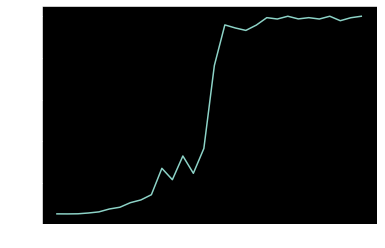

In [109]:
plt.plot(mean_rewards)